# Demo:

First, plot the energy bands for the 1d Kitaev chain as the ratio (mu/t) of on-site energy to nearest-neighbor hopping is tuned:

Constructing BdG Hamiltonian for Kitaev chain tuning on-site energy...


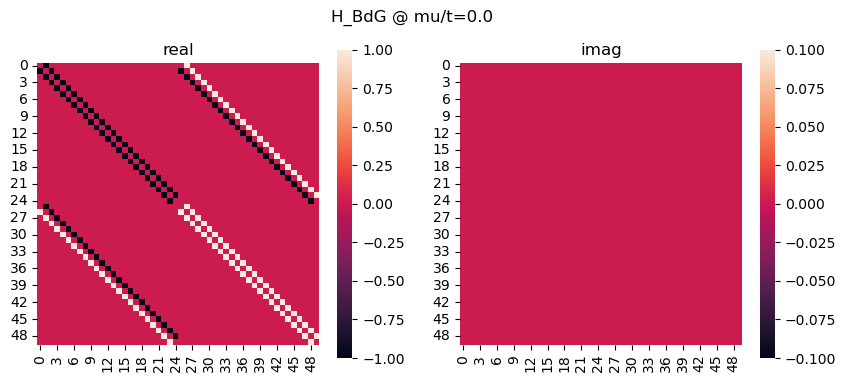

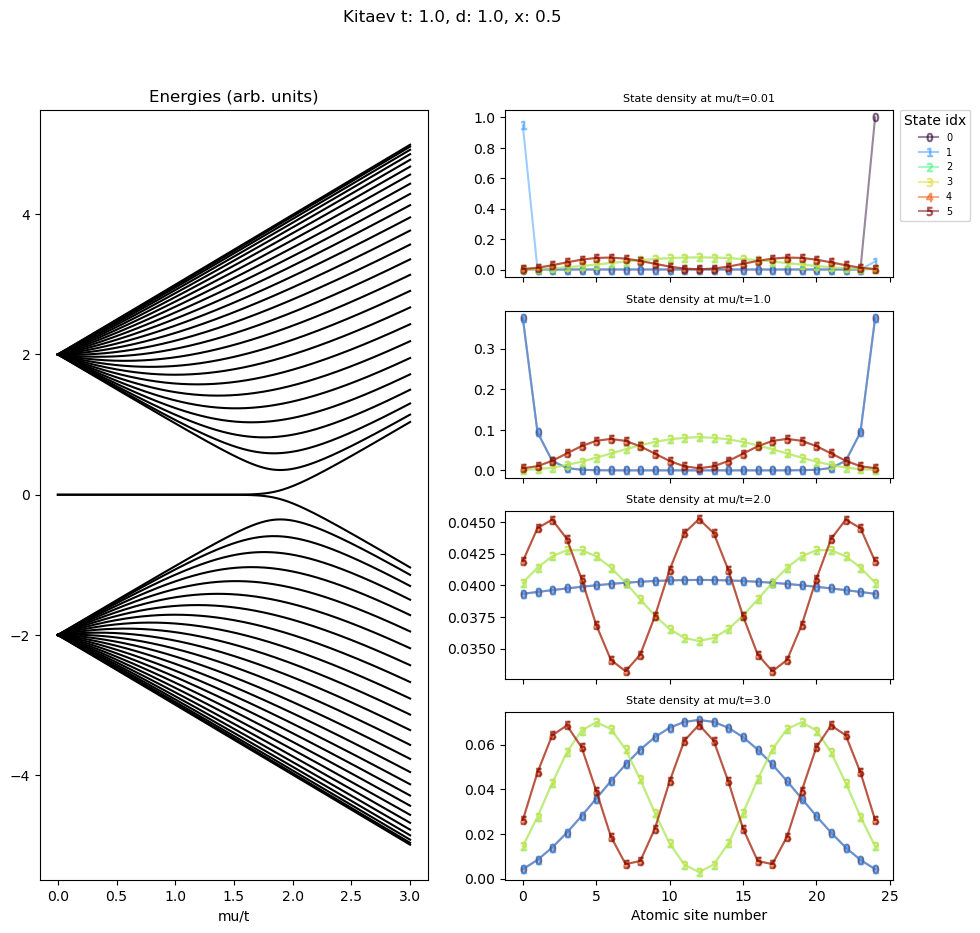

In [1]:
import numpy as np
from majorana_modes import H_BdG_constructor

# Set up initial set of params. 
model_params = {
    't_hopping': 1.0, 
    'd_cooper': 1.0, 
    'tuning_parameter': 'mu/t', 
    'parameter_space': np.linspace(0,3,301),
    'N_sites': 25,
}
# For now keep N small, and just visualize the Hamiltonian matrix
H_constructor = H_BdG_constructor('kitaev', model_params, show_ham=True, plot_band_idxs=[0,1,2])
H_constructor.construct_and_solve_hamiltonians()
H_constructor.plot_figures(param_values=[.01, 1, 2, 3], figsize=(11,10))

On the left side we see the similar band structure plotted in Topocondmat.

On the right side is the spatial distribution of some of the lowest-energy Majorana pairs.
Three interesting things:
1. At the highest `mu/t`=3, the individual majoranas are all paired up (completely overlapping spatial distribution), and their distributions just look like the regular ground/excited-state energies of an infinite potential well.

2. As we go toward smaller `mu/t`, the lowest-energy pair seem to get pushed out toward the ends of the chain, and at `mu/t`=1 they seem almost completely localized to the ends.

3. As we get to even closer to `mu/t`=0, while staying localized at the ends, the indivial majoranas of the lowest-energy pair start to become more and more spatially separated.

The plots above only speak to a finite 1d system of N atomic sites. However, we can add a hopping term between the last and first site; now our system is periodic and we use it to talk about bulk properties of macroscopic systems.

Now we can see the evolution of the system as we use parameter `x` to set the strength of last-to-first-site hopping `t' = t(1 - 2*x)`, where `t` is regular nn-hopping:

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


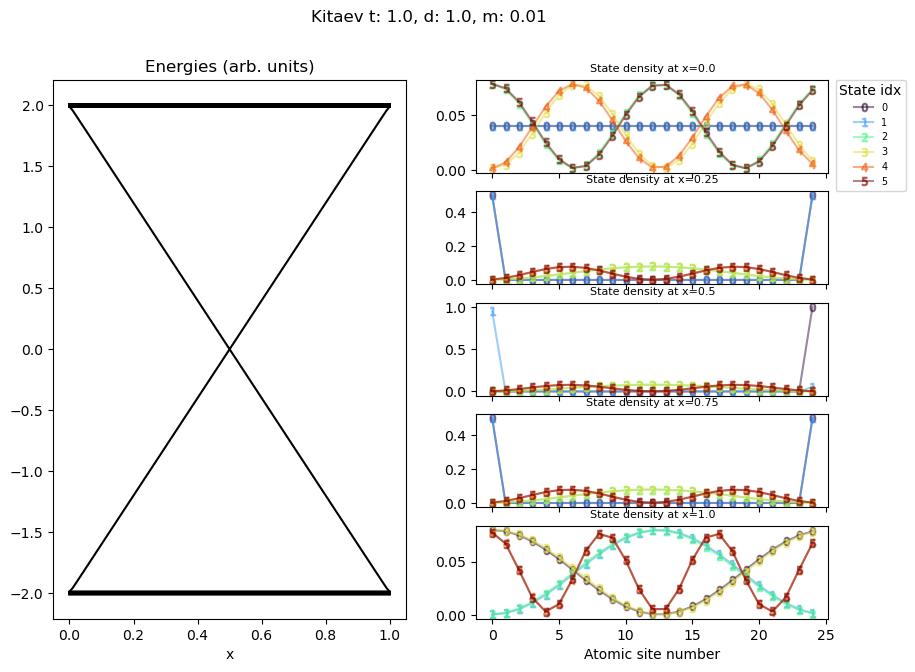

In [2]:
model_params = {
    'm_onsite': 0.01,
    't_hopping': 1.0, 
    'd_cooper': 1.0, 
    'tuning_parameter': 'x', 
    'parameter_space': np.linspace(0,1,101),
    'N_sites': 25,
}
H_constructor = H_BdG_constructor('kitaev', model_params, plot_band_idxs=[0,1,2])
H_constructor.construct_and_solve_hamiltonians()
H_constructor.plot_figures(param_values=[0.00, 0.25, 0.5, .75, 1])

Things to note:

1. At `x=0` we have `t'=t`: periodic hopping strength is indistinguishable from regular nn-hopping. The system is gapped, and lowest-energy states have wavelengths of `L/0` (inf) and `L/2`.
2. At the other end `t'=-t`: periodic hopping has opposite sign from regular nn-hopping. The system is also gapped here, and lowest-energy modes have wavelengths of `L/1` and `L/3`. 
3. As we start at either end `x=0` or `x=1` and move toward `x=0.5` (where `t'=0`, open chain), the lowest-energy modes have wavelengths `L/1` and `L/2`, with a non-sinusoidal lowest-energy mode localized to the 1st and last sites.
4. Right at `x=0.5`, the majoranas of the lowest-energy mode become unpaired and reside at opposite ends of the periodic cell. This is the same as the open chain from previous demo.

 Unlike the previous spatial distribution plots that represented the entire system, the distributions here represent only the periodic part of the whole system. Now considering the unpaired majoranas from `4.` in the entire bulk system, the unpaired majorana from the last site of one cell will simply pair up with the unpaired majorana of the next cell -- however we will still end up with two unpaired majoranas, one at each end of the bulk system.

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


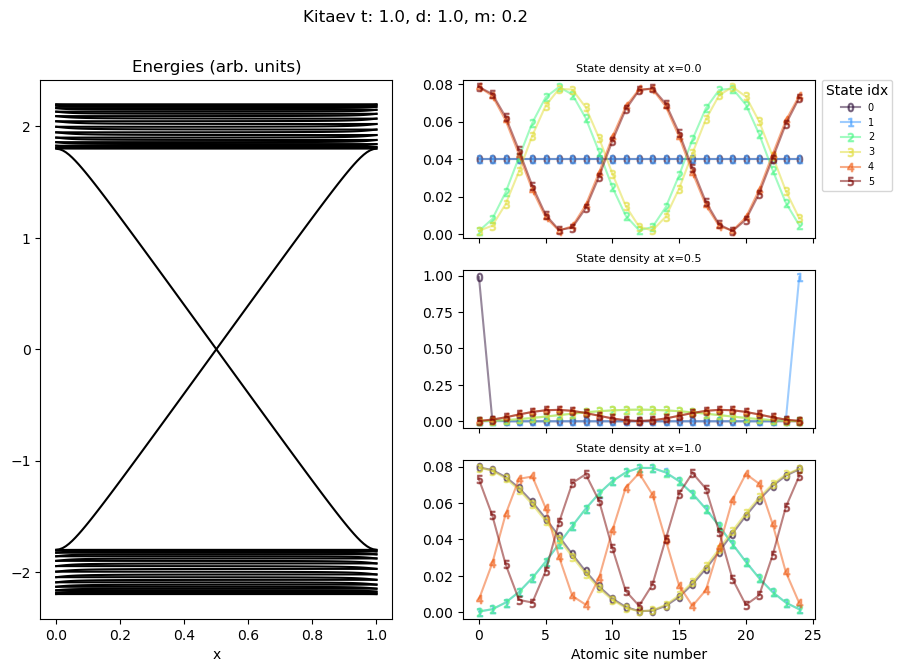

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


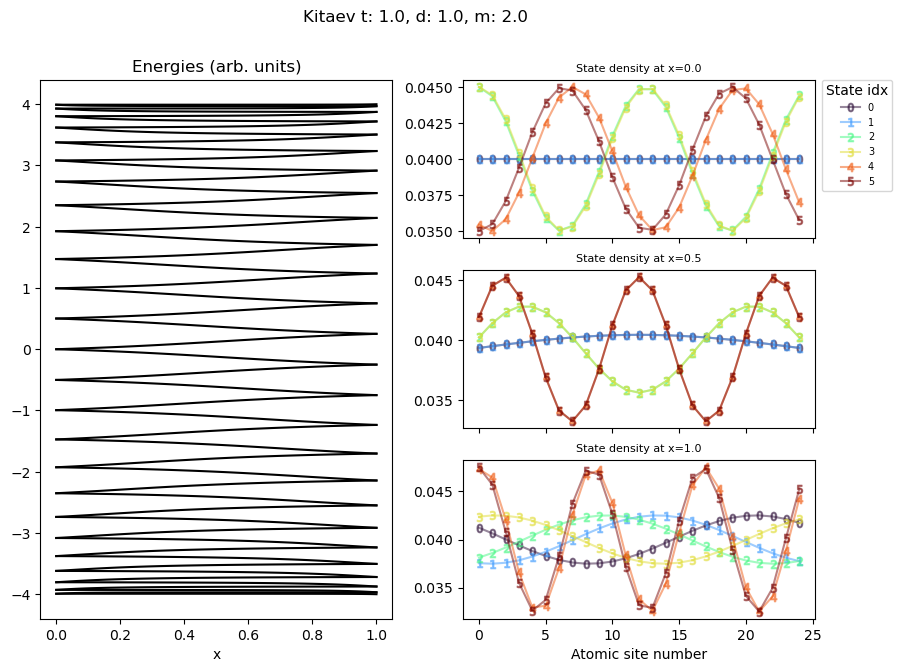

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


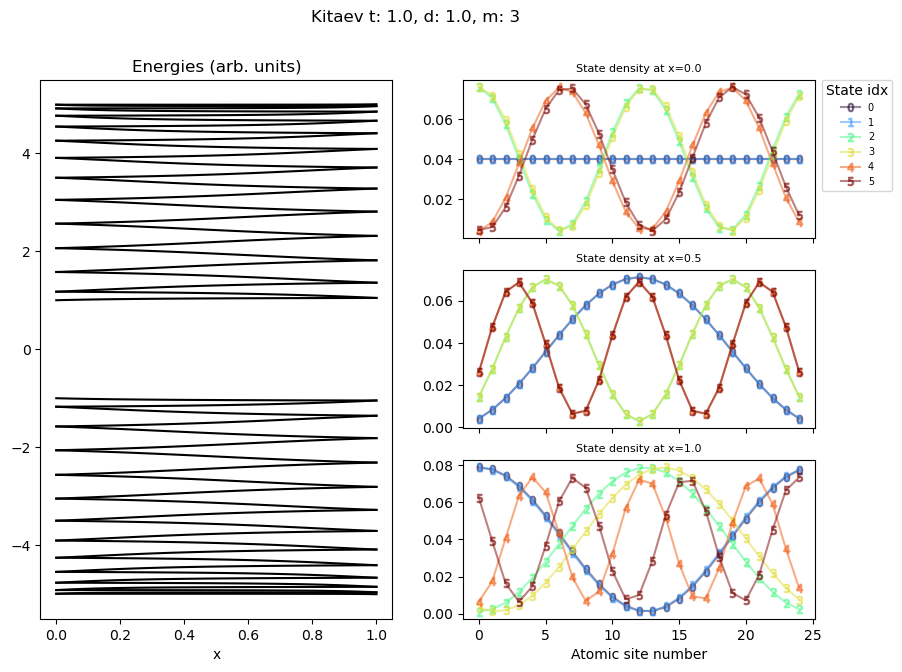

In [4]:
for mu in [0.2, 2.0, 3]:
    model_params['m_onsite'] = mu
    model_params['tuning_parameter'] = 'x'
    H_constructor = H_BdG_constructor('kitaev', model_params, plot_band_idxs=[0,1,2])
    H_constructor.construct_and_solve_hamiltonians()
    H_constructor.plot_figures()